<a href="https://colab.research.google.com/github/Utpal-Mishra/Optimal-Control-Therapy-4-Cancer-Treatment/blob/main/OptimalControlTherapy4CancerTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT**

### GOOGLE DRIVE

In [1]:
from google.colab import drive # import google drive into colaboratory
drive.mount("/content/drive")  # mount drive and the files

print("\nGOOGLE DRIVE is MOUNTED!!!")

Mounted at /content/drive

GOOGLE DRIVE is MOUNTED!!!


### LIBRARIES

In [2]:
import pandas as pd              # import pandas to use high-performance data structure and for data analysis
import numpy as np               # import numpy to evaluate data using mathematical operations
import matplotlib.pyplot as plt  # import matplotlib for 2D graphs and plots 
import seaborn as sns            # import seaborn for visualization 
import plotly.express as px      # import plotly for interactive plots
import plotly.graph_objects as go

import sys                       # import sys to manipulate Python runtime environment
sys.setrecursionlimit(100000)    # setting recursion limit for execusion

from sklearn import preprocessing                  # import preprocessing from sklearn statistical computations
from sklearn.preprocessing import StandardScaler   # import standardscaler for scaling the feature variables
scale = StandardScaler()                           # creating scaling object

print("LIBRARIES are IMPORTED!!!")

LIBRARIES are IMPORTED!!!


### DATA 

In [3]:
path = "/content/drive/MyDrive/UCD Research/Data.xlsx"   # set the path of the .csv file from drive

data = pd.read_excel(path)                                                                 # using read_csv() of pandas library to read the data file 
print("DATA is IMPORTED!!!")

print("\nDimensions of Data: ", data.shape)                                                # printing the dimensions of the dataset

DATA is IMPORTED!!!

Dimensions of Data:  (29, 48)


In [4]:
#data.head() # or data.head(n), n=5 by default
# taking a look at the first 5 rows of the data using .head() 
data.sort_values("Patient No.")
data.head()

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
0,0006 00007 RJW,2001-01-22,22,F,67.9,90,1.00,0.140,0.030,0.02,NaN,0.013,0.005037,0.014,0.020,0.004,0.005,0.006,0.003,0.004,0.003,0.002,0.002,0.003,0.002,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.001,NaN,0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-12,NaN
1,0004 00003-CAR,2000-08-29,23,F,67.9,,NaN,NaN,2.600,1.9,0.930,0.340,NaN,0.280,NaN,NaN,NaN,0.200,0.180,0.090,0.110,0.170,0.12,0.030,0.040,0.040,0.010,0.010,0.010,NaN,0.010,0.010,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-07,NaN
2,0003 00002 CL,2000-08-08,27,F,67.9,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300,0.700,NaN,0.350,0.480,0.170,0.33,0.450,0.360,0.310,NaN,NaN,NaN,0.180,NaN,0.120,NaN,NaN,NaN,0.1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-09,NaN
3,0011 00003 LM,2000-11-14,38,F,72.8,55,58.00,9.600,12.000,159,1.600,NaN,NaN,NaN,NaN,NaN,445.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-19,NaN
4,0001 00004 AJR,2000-08-04,51,F,75.9,28,0.08,0.026,0.042,0.022,0.018,NaN,0.003000,NaN,0.009,0.007,0.007,0.005,0.005,0.004,0.004,0.006,0.004,0.004,NaN,0.003,NaN,0.003,0.002,0.004,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-11,NaN


## **EXPLORATORY DATA ANALYSIS**

### DEALING WITH EMPTY/ NULL VALUES

ANALYZING TOTOAL EMPTY VALUES IN EACH FEATURE VARIABLE

In [5]:
if data.isna().sum().sum() != 0:
  print("EMPTY VALUES EXIST IN THE DATA\n\nFollowing is a list of feature variable with their respective null values count:\n", data.isna().sum())  #or data.applymap(np.isreal).all()
# listing the total number of null values in each column of the dataset

EMPTY VALUES EXIST IN THE DATA

Following is a list of feature variable with their respective null values count:
 Patient No.                      0
start date                       0
Age                              0
sex                              0
Weight (kg)                      0
Baseline                         1
3                                2
6                                5
9                                4
12                               6
15                              17
18                              12
21                              12
24                              11
27                              11
30                              11
33                               6
36                               7
39                               5
42                               7
45                               7
48                              10
51                              12
54                              10
57                              11
60         

1. FILLING NULL VALUES OF THE NUMERICAL FEATURES WITH THEIR MEANS
2. REMOVING NULL FEATURE VARIABLES
3. REPLACE 'Unknown' WITH EMPTY VALUES IN CATEGORICAL VARIABLES

In [6]:
data = data.fillna(data.mean())                                                        # filling null celss of feature variables with the mean value of non-empty cells
#data = data.fillna("Unknown")                                                          # filling left over empty categorical features with 'Unknown' label

data[51] = data[51].fillna(0)
data[51] = data[51].replace(" ", 0)
data[51] = data[51].astype(str).astype(float)

data[105] = data[105].fillna(0)
data[105] = data[105].replace(" ", 0)
data[105] = data[105].astype(str).astype(float)

data[12] = data[12].fillna(0)
data[12] = data[12].replace(" ", 0)
data[12] = data[12].astype(str).astype(float)

data.Baseline = data.Baseline.fillna(0)
data.Baseline = data.Baseline.replace(" ", 0)
data.Baseline = data.Baseline.astype(str).astype(int)

data["Unnamed: 47"] = data["Unnamed: 47"].fillna('Unknown')

print("EMPTY VALUES: ", data.isna().sum().sum())  #or data.applymap(np.isreal).all()   # listing the total number of null values in each column of the dataset

EMPTY VALUES:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [7]:
# from google.colab import files

# data.to_csv("data.csv")
# files.download("data.csv")

# **MODELING**

## **Splitting**

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
data.tail()

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47
24,0003 00003 WM,2000-08-15,62,M,88.6,113,153.00,55.00000,82.00,0.00,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,21.274826,1.667455,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2001-04-24,mutation detected at month 9
25,0010 00002 GR,2000-11-20,63,M,88.6,80,15.00,5.79725,0.11,0.04,0.246333,0.020000,0.020000,0.040000,0.0100,0.010000,0.010000,0.005000,0.006000,0.006000,0.008000,0.003000,0.002,0.004000,0.0030,0.045895,0.062615,0.00600,0.003000,0.006000,0.021767,0.001000,0.0020,0.002000,0.019231,0.002000,0.013083,0.00090,0.001000,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2009-02-19,Unknown
26,0002 00007 PMG,2000-11-27,64,M,88.6,25,1.90,0.48000,0.30,0.35,0.246333,0.200000,0.084179,0.160000,0.3200,0.200000,0.170000,0.070000,0.035000,0.075000,0.050000,4.602579,0.030,0.020000,0.0500,0.110000,0.030000,0.13000,0.030000,0.030000,0.040000,0.010000,0.0070,0.006000,0.007000,0.006000,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-05-16,Unknown
27,0001 00002 RH,2000-07-20,65,M,88.6,136,4.50,0.36000,0.21,0.17,0.246333,0.020000,0.008000,0.006000,0.0080,0.004708,0.007000,0.011000,0.004000,0.004000,0.005000,0.003000,0.004,0.002000,0.0020,0.002000,0.002000,0.00300,0.003000,0.001000,0.003000,0.002000,0.0010,0.001000,0.001000,0.001000,0.001000,0.00100,0.001000,0.001,0.001,0.06308,0.001407,0.14625,0.001375,0.004,2009-04-06,Unknown
28,0009 00001 DC,2000-09-25,65,M,88.6,0,0.21,0.23000,0.21,0.12,0.080000,0.080000,0.084179,0.030000,0.0500,0.050000,0.050000,0.040000,0.030000,0.020000,0.020000,0.030000,0.020,0.030000,0.0100,0.020000,0.013000,0.01300,0.005077,0.003000,0.021767,0.002000,0.0023,0.002000,0.002000,0.002000,0.002000,0.00529,0.001000,0.173,0.002,0.00200,0.001407,0.00200,0.002000,0.004,2010-08-04,Unknown


In [10]:
df = pd.DataFrame(data.groupby("Patient No.")[[3, 6, 9, 12, 15, 18, 21, 24, 27, 
                                               30, 33, 36, 39, 42, 45, 48, 51, 54, 
                                               57, 60, 63, 66, 69, 72, 75, 78, 81, 
                                               84, 87, 90, 93, 96, 99, 102,  105, 
                                               108,  111, 114, 117, 120,]].first()).reset_index()  # grouping the features based on class feature

df = df[df["Patient No."]=="0001 00002 RH"]

#print("Data Dimensions: ", df.shape)
#df.head()      

from sklearn.model_selection import train_test_split

X = df[df.columns[1:30]]
y = df[df.columns[30:41]]

x_train = X
y_train = y                                                                                                             # display last 5 data rows

## **TASK 1**

### **Model 1**

In [11]:
"""lr = LinearRegression()
  
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
y_pred = lr.predict(x_train)"""

#plt.yscale('log')
#plt.scatter(x_train, y_train, color ='b')
#plt.plot(y_train, lr.predict(x_train), color ='k')
#plt.plot(y_test, lr.predict(x_test), color ='red')

'lr = LinearRegression()\n  \nlr.fit(x_train, y_train)\nprint(lr.score(x_train, y_train))\ny_pred = lr.predict(x_train)'

In [12]:
"""#plot for the TRAIN
plt.yscale('log')
plt.scatter(x_train, y_train, color='red') # plotting the observation line
plt.plot(x_train, lr.predict(x_train), color='blue') # plotting the regression line
#plt.plot(x_train[10:30], lr.predict(x_train)[10:30], color='green') # plotting the regression line
plt.xlabel("t[days]") # adding the name of x-axis
plt.ylabel("BCR-ABL% Values") # adding the name of y-axis
plt.show() # specifies end of graph"""

'#plot for the TRAIN\nplt.yscale(\'log\')\nplt.scatter(x_train, y_train, color=\'red\') # plotting the observation line\nplt.plot(x_train, lr.predict(x_train), color=\'blue\') # plotting the regression line\n#plt.plot(x_train[10:30], lr.predict(x_train)[10:30], color=\'green\') # plotting the regression line\nplt.xlabel("t[days]") # adding the name of x-axis\nplt.ylabel("BCR-ABL% Values") # adding the name of y-axis\nplt.show() # specifies end of graph'

### **Model 2: A**

In [13]:
df = pd.DataFrame(data.groupby("Patient No.")[[3, 6, 9, 12, 15, 18, 21, 24, 27, 
                                               30, 33, 36, 39, 42, 45, 48, 51, 54, 
                                               57, 60, 63, 66, 69, 72, 75, 78, 81, 
                                               84, 87, 90, 93, 96, 99, 102,  105, 
                                               108,  111, 114, 117, 120,]].first()).reset_index()  # grouping the features based on class feature

stats = df.melt(id_vars=["Patient No."], var_name = "Imatinib Months", value_name="BCR-ABL% Values" )                          # create a dataframe with class, measuring parameters and values
#stats.sort_values(["Patient No.", "Imatinib Months"], inplace = True) 



df = stats[stats["Patient No."] == "0001 00002 RH"][["Imatinib Months", "BCR-ABL% Values"]]
df["Imatinib Months"] = df["Imatinib Months"].apply(lambda x: round(x*(365/12)))
df.head() # display last 5 data rows
#df["Imatinib Months"]   

,Imatinib Months,BCR-ABL% Values
0,91,4.500000
29,182,0.360000
58,274,0.210000
87,365,0.170000
116,456,0.246333


In [14]:
from google.colab import files

df.to_csv("stats.csv")
files.download("stats.csv")  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
Y = np.log10(Y)

#X = X.reshape(-1, 1)
#Y = Y.reshape(-1, 1)

print(X.shape)
print(Y.shape)

(40, 1)
(40,)


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearRegression()

for i in range(5,10,1):
  kfold = KFold(n_splits=i)
  mse = cross_val_score(model, X, Y, cv = kfold,scoring = "neg_mean_squared_error")
  #mselog = cross_val_score(model, X, Y, cv = kfold,scoring = "neg_mean_squared_log_error")
  var = cross_val_score(model, X, Y, cv = kfold,scoring = "explained_variance")
  r2 = cross_val_score(model, X, Y, cv = kfold,scoring = "r2")
  print("k: ",i, ":: MSE: %0.5f" % np.sqrt(-mse.mean()), ":: Variance: %.5f" % np.mean(var), ":: R2: %.5f:" % np.mean(r2)) #":: log(MSE): %.5f", np.mean(mselog)

k:  5 :: MSE: 1.13190 :: Variance: 0.18729 :: R2: -6.02311:
k:  6 :: MSE: 1.09831 :: Variance: 0.17552 :: R2: -5.88141:
k:  7 :: MSE: 1.07454 :: Variance: 0.00341 :: R2: -9.18268:
k:  8 :: MSE: 1.03113 :: Variance: 0.22938 :: R2: -8.02691:
k:  9 :: MSE: 0.94951 :: Variance: 0.20329 :: R2: -5.85702:


In [17]:
from sklearn.linear_model import LinearRegression
import random

lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X[:8, ], Y[:8, ])
lr2.fit(X[7:35, ], Y[7:35, ])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
import plotly.graph_objects as go
fig = go.Figure()

train_err = list()
test_err  = list()

for k in range(5, 10, 1):
    print("k: ", k)
    for i in range(len(X[:k, ])):
      # calculate error
      train_err = (Y[:k, ][i] - lr1.predict(X[:k, ][[i]]))**2
      #print("Error For Observation " + str(i+1) + ": %.5f" % Err[0])
    print("Training Error: %.5f" % train_err.sum())

    for i in range(len(X[k-2:35, ])):
      # calculate error
      Err = (Y[k-2:35, ][i] - lr1.predict(X[k-2:35, ][[i]]))**2
    print("Testing Error: %.5f" % Err.sum(), "\n")


k:  5
Training Error: 0.31322
Testing Error: 87.22667 

k:  6
Training Error: 0.02417
Testing Error: 87.22667 

k:  7
Training Error: 0.03316
Testing Error: 87.22667 

k:  8
Training Error: 0.00413
Testing Error: 87.22667 

k:  9
Training Error: 0.31413
Testing Error: 87.22667 



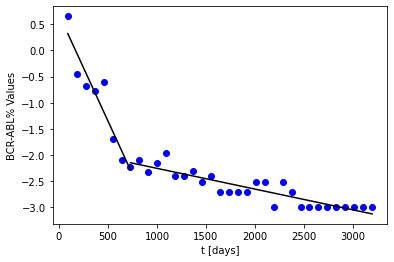

In [19]:
#plt.yscale("log")
plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(X[:8, ]), color='black')
plt.plot(X[7:35, ], lr2.predict(X[7:35, ]), color='black') 
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t [days]")
plt.show()

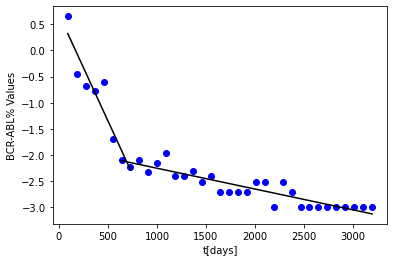

In [20]:
lr1.fit(X[:8, ], Y[:8, ])
lr2.fit(X[6:35, ], Y[6:35, ])

plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(X[:8, ]), color='black')
plt.plot(X[6:35, ], lr2.predict(X[6:35, ]), color='black')
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t[days]")
plt.show()

### **Polynomial**

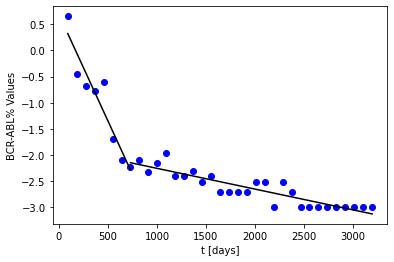

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 1)
X_poly = pr.fit_transform(X)

lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X_poly[:8, ], Y[:8, ])
lr2.fit(X_poly[7:35, ], Y[7:35, ])

#plt.yscale("log")
plt.scatter(X[:35, ], Y[:35, ], color='blue')
plt.plot(X[:8, ], lr1.predict(pr.fit_transform(X[:8, ])), color='black')
plt.plot(X[7:35, ], lr2.predict(pr.fit_transform(X[7:35, ])), color='black')
plt.ylabel("BCR-ABL% Values")
plt.xlabel("t [days]")
plt.show()

## **TASK 2**

### data

In [22]:
df = pd.DataFrame(data)
df.shape

(29, 48)

In [23]:
df.sex = data.sex.apply(lambda x: 0 if x == "F" else 1)
df["Weight/mean(Weight)-1"] = (df["Weight (kg)"]/round(df["Weight (kg)"].mean(), 1)) - 1
df["Age/mean(Age)-1"] = (df["Age "]/round(df["Age "].mean(), 1)) - 1
df["1 - sex"] = 1 - df["sex"]
df.head(3)

,Patient No.,start date,Age,sex,Weight (kg),Baseline,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed,Unnamed: 47,Weight/mean(Weight)-1,Age/mean(Age)-1,1 - sex
0,0006 00007 RJW,2001-01-22,22,0,67.9,90,1.000000,0.14000,0.0300,0.02,0.246333,0.013000,0.005037,0.014000,0.0200,0.004000,0.005000,0.006,0.003000,0.004,0.003,0.002,0.002,0.003,0.002,0.001,0.001000,0.00100,0.001000,0.001000,0.002000,0.001,0.0010,0.001000,0.019231,0.000400,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-06-12,Unknown,-0.189737,-0.529915,1
1,0004 00003-CAR,2000-08-29,23,0,67.9,0,11.928148,5.79725,2.6000,1.90,0.930000,0.340000,0.084179,0.280000,7.7335,0.205984,21.274826,0.200,0.180000,0.090,0.110,0.170,0.120,0.030,0.040,0.040,0.010000,0.01000,0.010000,2.504176,0.010000,0.010,0.0023,0.005000,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2007-09-07,Unknown,-0.189737,-0.508547,1
2,0003 00002 CL,2000-08-08,27,0,67.9,0,29.000000,5.79725,8.4222,0.00,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,1.300000,0.700,2.765458,0.350,0.480,0.170,0.330,0.450,0.360,0.310,0.062615,0.04135,0.005077,0.180000,0.021767,0.120,0.0023,0.022713,0.019231,0.120000,0.013083,0.00529,0.021929,0.173,0.0,0.06308,0.001407,0.14625,0.001375,0.004,2008-01-09,Unknown,-0.189737,-0.423077,1


In [24]:
Qa = 12.8
Qb = 258 
Q1 = 12.7
Q2 = 0.8
Q3 = -2.1
Q4 = 61.0
ka = 0.61

CL = Qa + Q1*df["Weight/mean(Weight)-1"] + Q2*df['sex'] - Q2*df["1 - sex"] + Q3*df["Age/mean(Age)-1"]
v  = Qb + Q4*df['sex'] - Q4*df["1 - sex"]
df["CL"] = CL
df["v"] = v

df = pd.DataFrame(data[['Patient No.', 'start date', 'Age ', 'Age/mean(Age)-1', 'sex', '1 - sex', 'Weight (kg)', 'Weight/mean(Weight)-1', 
       'Baseline', 'CL', 'v', 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42,
       45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93,
       96, 99, 102, 105, 108, 111, 114, 117, 120,
       'Date of last sample analysed']])
df.head(10)

,Patient No.,start date,Age,Age/mean(Age)-1,sex,1 - sex,Weight (kg),Weight/mean(Weight)-1,Baseline,CL,v,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,Date of last sample analysed
0,0006 00007 RJW,2001-01-22,22,-0.529915,0,1,67.9,-0.189737,90,10.703155,197.0,1.000000,0.14000,0.0300,0.020,0.246333,0.013000,0.005037,0.014000,0.0200,0.004000,0.005000,0.006000,0.003000,0.004000,0.003000,0.002000,0.002,0.003000,0.0020,0.001000,0.001000,0.00100,0.001000,0.001000,0.002000,0.001000,0.0010,0.001000,0.019231,0.000400,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-06-12
1,0004 00003-CAR,2000-08-29,23,-0.508547,0,1,67.9,-0.189737,0,10.658283,197.0,11.928148,5.79725,2.6000,1.900,0.930000,0.340000,0.084179,0.280000,7.7335,0.205984,21.274826,0.200000,0.180000,0.090000,0.110000,0.170000,0.120,0.030000,0.0400,0.040000,0.010000,0.01000,0.010000,2.504176,0.010000,0.010000,0.0023,0.005000,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2007-09-07
2,0003 00002 CL,2000-08-08,27,-0.423077,0,1,67.9,-0.189737,0,10.478796,197.0,29.000000,5.79725,8.4222,0.000,0.246333,3.030176,0.084179,0.948278,7.7335,0.205984,1.300000,0.700000,2.765458,0.350000,0.480000,0.170000,0.330,0.450000,0.3600,0.310000,0.062615,0.04135,0.005077,0.180000,0.021767,0.120000,0.0023,0.022713,0.019231,0.120000,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-01-09
3,0011 00003 LM,2000-11-14,38,-0.188034,0,1,72.8,-0.131265,55,10.727807,197.0,58.000000,9.60000,12.0000,159.000,1.600000,3.030176,0.084179,0.948278,7.7335,0.205984,445.000000,1.667455,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2003-08-19
4,0001 00004 AJR,2000-08-04,51,0.089744,0,1,75.9,-0.094272,28,10.614283,197.0,0.080000,0.02600,0.0420,0.022,0.018000,3.030176,0.003000,0.948278,0.0090,0.007000,0.007000,0.005000,0.005000,0.004000,0.004000,0.006000,0.004,0.004000,0.0435,0.003000,0.062615,0.00300,0.002000,0.004000,0.021767,0.003000,0.0023,0.022713,0.019231,0.021338,0.013083,0.00529,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2007-01-11
5,0011 00001 CMC,2000-10-24,52,0.111111,0,1,75.9,-0.094272,213,10.569411,197.0,7.600000,0.51000,0.0900,0.070,0.246333,0.030000,0.084179,0.948278,7.7335,0.205984,21.274826,0.010000,0.010000,0.005000,0.007000,0.003000,0.003,0.009000,0.0040,0.002000,0.062615,0.00300,0.002000,2.504176,0.021767,0.018368,0.0030,0.022713,0.010000,0.003000,0.013083,0.00200,0.001000,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-12-12
6,0010 00001 HJ,2000-09-08,57,0.217949,0,1,75.9,-0.094272,39,10.345052,197.0,6.300000,0.25000,0.1300,0.170,0.150000,3.030176,0.060000,0.130000,7.7335,0.030000,0.030000,0.010000,0.060000,0.010000,0.010000,0.014000,0.020,0.004000,0.0030,0.000900,0.062615,0.00400,0.001000,0.004000,0.000200,0.004000,0.0009,0.000700,0.019231,0.001000,0.001000,0.00100,0.021929,0.173,0.000,0.06308,0.001407,0.14625,0.001375,0.004,2008-10-01
7,0007 00002 DPS,2000-08-04,22,-0.529915,1,0,80.7,-0.036993,172,14.243011,319.0,11.928148,5.79725,0.1000,0.140,0.020000,3.030176,0.020000,0.948278,0.0200,0.205984,21.274826,1.667455,0.020000,3.391273,0.006000,4.602579,0.000,0.054789,0.0435,0.045895,0.062615,0.04135,0.005077,2.504176,0.021767,0.018368,0.0020,0.022713,0.008000,0.021338,0.013083,0.00529,0.290000,0.173,0.005,0.06308,0.001407,0.14625,0.002000,0.004,2010-06-08
8,0002 00003 SMV,2000-09-04,24,-0.487179,1,0,80.7,-0.036993,0,14.153268,319.0,0.120000,0.02700,0.0250,0.033,0.029000,3.030176,0.012000,0.017000,0.0130,0.013000,0.018000,0.014000,2.765458,3.391273,2.227182,4.602579,0.000,0.054789,0.0020,0.004000,0.003000,0.00300,0.002000,0.002000,0.005000,0.002000,0.0030,0.008000,0.001000,0.021338,0.001000,0.00529,0.001000,0.0

### solve_ivp

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

from scipy.integrate import solve_ivp # import scipy.integrate.solve_ivp to solve the equation

In [26]:
# solving non-differential equations 
def ode_chi_solve():
    CL=14.3 # Clearance rate, has units of Volume / Time, or Litres / Hours
    ka=0.61 # Contstant ka with units of 1/hours
    v=347   # Volume of blood in the pateints body, units of Litres
    D=400   # D is dose, units of mass, standard units of mass here are milligrams, take D=400 mg
    f=1     # Bioavailability 
    t_eval = np.arange(0, 24, 0.3) # Times at which to store the computed solution, and must be sorted

    F = lambda t, s: -ka*s # lambda function is used to have a function with unsed input
    chig = solve_ivp(F, [0, 24], [D*f], t_eval=t_eval) # takes the integral of F over [0, 24] with intial state [D*f] and t_eval time
    # solve_ivp(fun,t_span,s0,method=′RK45′,t_eval=None)
    # F take in the function in the right-hand side of the system
    # t_span is the limit of integral from 0 to 24
    # s0 defines the intial state to D*f
    # t_eval takes in the times at which to store the computed solution, and must be sorted and lie within t_span
    #chig # solution of the equation

    F = lambda t, s: ka*t -(CL/v)*s # lambda function is used to have a function with unsed input
    chib = solve_ivp(F, [0, 24], [D*f, 0], t_eval=t_eval) # takes the integral of F over [0, 24] with intial state [0, D*f] and t_eval time
    # solve_ivp(fun,t_span,s0,method=′RK45′,t_eval=None)
    # F take in the function in the right-hand side of the system
    # t_span is the limit of integral from 0 to 24
    # s0 defines the intial state [0, D*f]
    # t_eval takes in the times at which to store the computed solution, and must be sorted and lie within t_span
    #chib # solution of the equation

    return chig.t, chig.y[0], chib.y[1] # return the solution to the linear equation chig.t == chib.t (t_eval)

ode_chi_solve() # call the function to execute

(array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
        13.2, 13.5, 13.8, 14.1, 14.4, 14.7, 15. , 15.3, 15.6, 15.9, 16.2,
        16.5, 16.8, 17.1, 17.4, 17.7, 18. , 18.3, 18.6, 18.9, 19.2, 19.5,
        19.8, 20.1, 20.4, 20.7, 21. , 21.3, 21.6, 21.9, 22.2, 22.5, 22.8,
        23.1, 23.4, 23.7]),
 array([4.00000000e+02, 3.33094307e+02, 2.77370333e+02, 2.31001227e+02,
        1.92392470e+02, 1.60180648e+02, 1.33349986e+02, 1.11059436e+02,
        9.25405447e+01, 7.70975996e+01, 6.41874838e+01, 5.34391676e+01,
        4.45098731e+01, 3.70877072e+01, 3.08929494e+01, 2.57185890e+01,
        2.14132801e+01, 1.78371279e+01, 1.48630495e+01, 1.23785802e+01,
        1.03050218e+01, 8.58061500e+00, 7.14829168e+00, 5.95630701e+00,
        4.95993352e+00

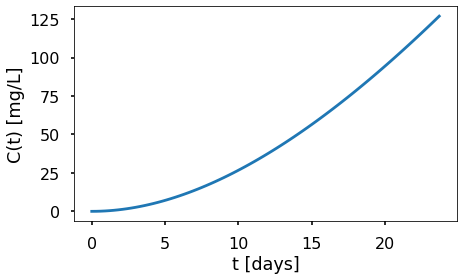

In [27]:
def chig(CL, v):
  CL=14.3 
  ka=0.61 
  v=347   
  D=400   
  f=1     
  t_eval = np.arange(0, 24, 0.3)  

  F = lambda t, s: ka*t -(CL/v)*s
  chig = solve_ivp(F, [0, 24], [D*f, 0], t_eval=t_eval)
  chig.y[1]

  plt.figure(figsize = (12, 4))
  plt.subplot(121)
  plt.plot(chig.t, chig.y[1])
  plt.xlabel('t [days]')
  plt.ylabel('C(t) [mg/L]')
  plt.tight_layout()
  plt.show()


CL=14.3 
v=347 

chig(CL, v)

### odeint

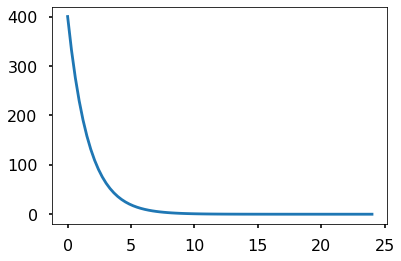

In [28]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def model(t, s):
  CL=14.3
  v=347  
  ka = 0.61
  dchigdt = -ka*t 
  #dchibdt = ka*t + (CL/v)*s
  return dchigdt#, dchibdt

CL=14.3 
ka=0.61 
v=347   
D=400   
f=1     
y0 = (D*f)
t_eval = np.linspace(0, 24, 80) #np.arange(0, 24, 0.3)
#chig, chib = odeint(model, y0, t_eval)
result = odeint(model, y0, t_eval)

#for i in result:
#  print(i[0], "\t")

plt.plot(t_eval,result)

In [29]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def pkmodel(x, t):
  CL=14.3 
  ka=0.61 
  v=347   
  chig = x[0]
  chib = x[1]

  #dchigdt = -ka*chig
  #dchibdt = ka*chig - CL*(chib/v)
  dydt = [-ka*chig, ka*chig - CL*(chib/v)]
  return dydt

D = 400
f = 1
xi = [D*f, 0]
t_eval = np.linspace(0, 24, 80) #np.arange(0, 24, 0.3)
Y = (odeint(pkmodel, xi, t_eval))

# plt.plot(t_eval, Y[:, 0]) #chig: amount of Imatinib in the gastrointestinal tract
# plt.plot(t_eval, Y[:, 1]) #chib: the amount of Imatinib in the blood
# plt.ylabel("C(t) [mg/L]")
# plt.xlabel("t [days]")
# plt.show()

fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chig", "", "Time vs chib"))
fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 0], name = "chig: change in amount of Imatinib in the gastrointestinal tract with time"), row=1, col=1)
fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 1], name = "chib: change in the amount of Imatinib in the blood with time"), row=1, col=3)
fig.update_layout(height=400, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_yaxes(title_text = "chig", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.show()

In [30]:
from scipy import integrate

X, infodict = integrate.odeint(pkmodel,xi,t_eval,full_output=True);
print(infodict['message'])
#print(X)

# plt.plot(t_eval, X.T[0]) #chig: amount of Imatinib in the gastrointestinal tract
# plt.plot(t_eval, X.T[1]) #chib: the amount of Imatinib in the blood
# plt.ylabel("C(t) [mg/L]")
# plt.xlabel("t [days]")
# plt.show()

fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chig", "", "Time vs chib"))
fig.add_trace(go.Scatter(x=t_eval, y=X.T[0], name = "chig: change in amount of Imatinib in the gastrointestinal tract with time"), row=1, col=1)
fig.add_trace(go.Scatter(x=t_eval, y=X.T[1], name = "chib: change in the amount of Imatinib in the blood with time"), row=1, col=3)
fig.update_layout(height=400, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_yaxes(title_text = "chig", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.show()

Integration successful.


In [31]:
def pkmodel(x, t, CL, v):
    CL, v = CL, v
    #CL=14.3 
    ka=0.61 
    #v=347   
    chig = x[0]
    chib = x[1]
  
    #dchigdt = -ka*chig
    #dchibdt = ka*chig - CL*(chib/v)
    dydt = [-ka*chig, ka*chig - CL*(chib/v)]
    return dydt

D = 400
f = 1
xi = [D*f, 0]
t_eval = np.arange(0, 24, 0.3) #np.arange(0, 24, 0.3)

print("Dimensions of Data: ", df.shape, "\n")

for i in range(df.shape[0]):
    print("\nPatient: ", df["Patient No."][i], " :: Clearance: ", df["CL"][i], " :: Volumne: ", df["v"][i], "\n")
    #params = (df["CL"][i], df["v"][i])
    CL = df["CL"][i]
    v  = df["v"][i]
    Y = odeint(pkmodel, xi, t_eval, args = (CL, v))

    # plt.figure()
    # plt.plot(t_eval, Y[:, 0]) #chig: amount of Imatinib in the gastrointestinal tract
    # plt.plot(t_eval, Y[:, 1]) #chib: the amount of Imatinib in the blood
    # plt.ylabel("C(t) [mg/L]")
    # plt.xlabel("t[days]")
    # plt.show()

    fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chig", "Time vs chib"))
    fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 0], name = "chig: change in amount of Imatinib in the gastrointestinal tract with time"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t_eval, y=Y[:, 1], name = "chib: change in the amount of Imatinib in the blood with time"), row=1, col=3)
    fig.update_layout(height=400, width=900, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_yaxes(title_text = "chig", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
    fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
    fig.show()

Dimensions of Data:  (29, 52) 


Patient:  0006 00007 RJW  :: Clearance:  10.703154641698795  :: Volumne:  197.0 




Patient:  0004 00003-CAR  :: Clearance:  10.658282846827001  :: Volumne:  197.0 




Patient:  0003 00002 CL  :: Clearance:  10.47879566733982  :: Volumne:  197.0 




Patient:  0011 00003  LM  :: Clearance:  10.727807355730985  :: Volumne:  197.0 




Patient:  0001 00004 AJR  :: Clearance:  10.614283091610062  :: Volumne:  197.0 




Patient:  0011 00001 CMC  :: Clearance:  10.569411296738267  :: Volumne:  197.0 




Patient:  0010 00001 HJ  :: Clearance:  10.345052322379292  :: Volumne:  197.0 




Patient:  0007 00002 DPS  :: Clearance:  14.243011443608104  :: Volumne:  319.0 




Patient:  0002 00003 SMV  :: Clearance:  14.153267853864515  :: Volumne:  319.0 




Patient:  0011 00005 SCW  :: Clearance:  14.063524264120925  :: Volumne:  319.0 




Patient:  0001 00006 GMC  :: Clearance:  14.553830854904843  :: Volumne:  319.0 




Patient:  0002 00008 SAT  :: Clearance:  14.374343675417663  :: Volumne:  319.0 




Patient:  0004 00004 GDH  :: Clearance:  14.663478367296984  :: Volumne:  319.0 




Patient:  0011 00007 AJS  :: Clearance:  14.483991187809805  :: Volumne:  319.0 




Patient:  0001 00003 AB  :: Clearance:  14.34937580319442  :: Volumne:  319.0 




Patient:  0004 00006 GM  :: Clearance:  14.304504008322624  :: Volumne:  319.0 




Patient:  0007 00001 AJV  :: Clearance:  14.214166819656082  :: Volumne:  319.0 




Patient:  0003 00004 GSW  :: Clearance:  14.169295024784287  :: Volumne:  319.0 




Patient:  0001 00009 MJG  :: Clearance:  14.079551435040697  :: Volumne:  319.0 




Patient:  0008 00005 BAT  :: Clearance:  14.079551435040697  :: Volumne:  319.0 




Patient:  0008 00002 PWR  :: Clearance:  13.989807845297108  :: Volumne:  319.0 




Patient:  0006 00006 ML  :: Clearance:  13.855192460681723  :: Volumne:  319.0 




Patient:  0008 00003 LJG  :: Clearance:  13.810320665809927  :: Volumne:  319.0 




Patient:  0009 00003 LH  :: Clearance:  13.690266813536505  :: Volumne:  319.0 




Patient:  0003 00003 WM  :: Clearance:  13.64539501866471  :: Volumne:  319.0 




Patient:  0010 00002 GR  :: Clearance:  13.600523223792916  :: Volumne:  319.0 




Patient:  0002 00007 PMG  :: Clearance:  13.55565142892112  :: Volumne:  319.0 




Patient:  0001 00002 RH  :: Clearance:  13.510779634049326  :: Volumne:  319.0 




Patient:  0009 00001 DC  :: Clearance:  13.510779634049326  :: Volumne:  319.0 



## **TASK 3**

### time vs chib || time vs penalty || standard dose administration

In [32]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate
from scipy.interpolate import interp1d, LSQUnivariateSpline, splrep, UnivariateSpline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 0.57
    #G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        """if(z_val > C_targ):
            penalty_val = abs(z_val - C_targ)          
        else:
            penalty_val = G"""
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


D                 = 400
TD                = 24
n_doses           = 10
ka                = 0.61
f                 = 1
initial_condition = [D*f, 0]
CL                = 17.3446
v                 = 319
n_gridpoints      = 20

t_vec    = [] #np.zeros((n_gridpoints, n_doses))
chig_vec = [] #np.zeros((n_gridpoints, n_doses))
chib_vec = [] #np.zeros((n_gridpoints, n_doses))


for i in range(n_doses):
   #print(i)
   t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
   #print(t_eval)
   Y      = (odeint(pkmodel, initial_condition, t_eval))

   #print(t_eval, "\n")

   chig = Y[:, 0]
   chib = Y[:, 1]

   # interpolate the numerical solution onto a regular grid from
   # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
   t_init  = t_eval[0]
   t_final = t_eval[-1]
   #print(t_init, t_final, "\n")

   dt      = (t_final - t_init)/(n_gridpoints - 1)
   ti      = np.linspace(t_init, t_final, 80)
   #print(ti, "\n") 
      
   #LSQUnivariateSpline
   #splrep
   #spline
   #print("Before", chig, "\n")
   chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
   #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
   #print(chig_temp[1])
   #print(chib)
   chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
   #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
   #print(chib_temp[1], chib[0:80:4], "\n")
      
   #t_vec[:, i]    = ti
   #chig_vec[:, i] = chig_temp[1]
   #chib_vec[:, i] = chib_temp[1]

   t_vec.append(ti)
   chig_vec.append(chig_temp[1])
   #chib_vec.append(chib_temp[1])
   chib_vec.append(chib[0:80:4])

   #print(initial_condition, "\n")
   initial_condition = [chig[-1] + D*f, chib[-1]]
      

#t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
#chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
#chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


#print(len(t_vec))
#print(len(chig_vec))
#print(len(chib_vec))

#t = t_vec
for i in range(len(t_vec)):
   t_vec[i] = t_vec[i][0:80:4]
t = []
for i in t_vec:
   for k in i:
      t.append(k)

chig = chig_vec

chib = []
for i in chib_vec:
   for k in i:
       chib.append(k)

penalty = get_penalty_fn(t, chib, v)
penalty[0] = 0
#print(penalty)
print("Dose: ",D)
print("chib: ",chib)
print("Penalty: ",penalty, "\n")

#plt.figure()
#plt.plot(t, np.divide(chib, v))
#plt.set_title("Time vs chib")
#plt.xlabel("Time")
#plt.label("chib")
#plt.show()
#plt.plot(t, penalty, color = "red")
#plt.set_title("Time vs Penalty")
#plt.xlabel("Time")
#plt.label("Penalty")
#plt.show()

fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chib","", "Time vs Penalty"))
fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time"), row=1, col=1)
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time"), row=1, col=3)
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.update_yaxes(title_text = "penalty", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.update_layout(height=400, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
# fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True)
# fig.update_yaxes(title_text = "C(t) [mg/L]", showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()

Dose:  400
chib:  [0.0, 201.80931436483095, 285.07054762429397, 312.6673618942746, 314.5117339592252, 304.80765449985597, 290.2772553977393, 274.0804401866525, 257.68243979859994, 241.74354527374865, 226.5429090894446, 212.18033589877422, 198.6722928834601, 185.99752388461786, 174.1186579295034, 162.99238693902626, 152.57420415315198, 142.82055779381395, 133.68977973260934, 125.14243666507473, 119.0923942669871, 313.2874381422398, 389.4211835130865, 410.346195206701, 405.9453265280327, 390.39530069184866, 370.3927226462278, 349.0735997525536, 327.8807939615314, 307.4536572210244, 288.0517415411272, 269.7565042257409, 252.56723813888476, 236.44661085613643, 221.3422029930221, 207.19662019893212, 193.95217006836916, 181.55295822218523, 169.9457630743971, 159.08033655072492, 151.38952346819735, 343.5195964276848, 417.72040263818985, 436.83606096264725, 430.7415205047672, 413.60611086609384, 392.1195130508334, 369.41125354465913, 346.9181277882616, 325.27380909292185, 304.73253390745856, 2

_Optimization_

In [33]:
"""from scipy.optimize import fsolve

try: 
  result = fsolve(pkmodel, initial_condition, t_eval)
except:
  print("Error")

print(result)"""

'from scipy.optimize import fsolve\n\ntry: \n  result = fsolve(pkmodel, initial_condition, t_eval)\nexcept:\n  print("Error")\n\nprint(result)'

In [34]:
"""import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate
from scipy.interpolate import interp1d, LSQUnivariateSpline, splrep, UnivariateSpline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def optimize(d):

    def pkmodel(x, t):
      CL   = 17.3446 
      ka   = 0.61 
      v    = 319
      chig = x[0]
      chib = x[1]

      #dchigdt = -ka*chig
      #dchibdt = ka*chig - CL*(chib/v)
      dydt = [-ka*chig, ka*chig - CL*(chib/v)]
      return dydt

    def get_penalty_fn(t, chib, v):
        C_targ = 0.57
        #G     = 0.57 
        temp   = []
        #print(t[1], t[0])
        dt     = t[1] - t[0];
          
        for i in range(len(t)):
            z_val = chib[i]/v
            penalty_val = abs(z_val - C_targ)
            #print(z_val > C_targ)
            #if(z_val > C_targ):
            #    penalty_val = abs(z_val - C_targ)          
            #else:
            #    penalty_val = G
            temp.append(penalty_val)
          #print(temp)
          
        penalty = []
      
        for i in range(len(t)):
            penalty.append(sum(temp[1:i-1])*dt)
          
        return penalty


    D                 = params["D"]
    TD                = 24
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    initial_condition = [D*f, 0]
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20


    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))

  
    for i in range(n_doses):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 80)
      #print(ti, "\n") 
      
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
      
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:80:4])

      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
      

    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:80:4]
    t = []
    for i in t_vec:
      for k in i:
        t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
        chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0
    #print(penalty)
    print("Dose: ",D)
    print("chib: ",chib)
    print("Penalty: ",penalty, "\n")

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    #plt.figure()
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.suptitle('Drug Dose Administration: Retracing S8')
    #ax1.plot(t, np.divide(chib, v))
    #ax1.set_title("Time vs chib")
    #ax1.xlabel("Time")
    #ax1.label("chib")
    #ax1.show()
    #ax2.plot(t, penalty, color = "red")
    #ax2.set_title("Time vs Penalty")
    #ax2.xlabel("Time")
    #ax2.label("Penalty")
    #ax2.show()

    fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=("Time vs chib","Time vs Penalty"))
    fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time"), row=1, col=2)
    fig.update_layout(height=400, width=800, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    fig.show()

#!pip install lmfit
from lmfit import minimize, Parameters, Parameter, report_fit

params = Parameters()
params.add('D', min=, max=400, vary=True)
#params.add('chib', value=0.0, min=0.0, max=2.0, vary=True)
#params.add('v', value=347, vary=False)
#params["D"]

# fit model
try:
  result = minimize(optimize, params, method='least_squares')
except:
  print("Error")"""

'import numpy as np\nfrom scipy.integrate import odeint, solve_ivp\nimport matplotlib.pyplot as plt\nimport scipy as sp\nimport scipy.interpolate\nfrom scipy.interpolate import interp1d, LSQUnivariateSpline, splrep, UnivariateSpline\nimport plotly.express as px\nfrom plotly.subplots import make_subplots\nimport plotly.graph_objects as go\n\ndef optimize(d):\n\n    def pkmodel(x, t):\n      CL   = 17.3446 \n      ka   = 0.61 \n      v    = 319\n      chig = x[0]\n      chib = x[1]\n\n      #dchigdt = -ka*chig\n      #dchibdt = ka*chig - CL*(chib/v)\n      dydt = [-ka*chig, ka*chig - CL*(chib/v)]\n      return dydt\n\n    def get_penalty_fn(t, chib, v):\n        C_targ = 0.57\n        #G     = 0.57 \n        temp   = []\n        #print(t[1], t[0])\n        dt     = t[1] - t[0];\n          \n        for i in range(len(t)):\n            z_val = chib[i]/v\n            penalty_val = abs(z_val - C_targ)\n            #print(z_val > C_targ)\n            #if(z_val > C_targ):\n            #    pe

In [43]:
from scipy.optimize import curve_fit

try:
  popt, pcov = curve_fit(optimize, initial_condition, t_eval, bounds = (0, 400))
except:
  print("Error\n")

Error



### time vs chib || time vs penalty || standard dose administration || matplotlib animation plot

In [ ]:
x = t
y = np.divide(chib, v)
xm = 0
xM = 200
ym = 0
yM = 1.5
N = 80
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2

fig = go.Figure(
    data=[go.Scatter(x=x, y=y, mode="lines", line=dict(width=2, color="blue"), name = "Imatinib concentration in the blood with time"),
          go.Scatter(x=x, y=y, mode="lines", line=dict(width=2, color="blue"), name = "Change in the amount of Imatinib in the blood with time")],

    layout=go.Layout(xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
                     updatemenus=[dict(type="buttons", 
                                       buttons=[dict(label="Play", method="animate", args=[None])])]),
                
    frames=[go.Frame(data=[go.Scatter(x=[xx[k]], y=[yy[k]], mode="markers", marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.update_layout(height=400, width=600, title_text="Optimal Control Therapy for Cancer Treatment (Kinematics)") 
fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()

### time vs chib || time vs openalty || 1 dose optimization: Nelder-Mead simplex algorithm || ploty plots

In [ ]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate
from scipy.interpolate import interp1d, LSQUnivariateSpline, splrep, UnivariateSpline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def optimize(d):

    def pkmodel(x, t):
      CL   = 17.3446 
      ka   = 0.61 
      v    = 319
      chig = x[0]
      chib = x[1]

      #dchigdt = -ka*chig
      #dchibdt = ka*chig - CL*(chib/v)
      dydt = [-ka*chig, ka*chig - CL*(chib/v)]
      return dydt

    def get_penalty_fn(t, chib, v):
        C_targ = 0.57
        #G     = 0.57 
        temp   = []
        #print(t[1], t[0])
        dt     = t[1] - t[0];
          
        for i in range(len(t)):
            z_val = chib[i]/v
            penalty_val = abs(z_val - C_targ)
            #print(z_val > C_targ)
            """if(z_val > C_targ):
                penalty_val = abs(z_val - C_targ)          
            else:
                penalty_val = G"""
            temp.append(penalty_val)
          #print(temp)
          
        penalty = []
      
        for i in range(len(t)):
            penalty.append(sum(temp[1:i-1])*dt)
          
        return penalty


    D                 = d
    TD                = 24
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    initial_condition = [D*f, 0]
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20


    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))

  
    for i in range(n_doses):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 80)
      #print(ti, "\n") 
      
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
      
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:80:4])

      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
      

    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:80:4]
    t = []
    for i in t_vec:
      for k in i:
        t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
        chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0
    #print(penalty)
    print("Dose: ",D)
    print("chib: ",chib)
    print("Penalty: ",penalty, "\n")

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    #plt.figure()
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.suptitle('Drug Dose Administration: Retracing S8')
    #ax1.plot(t, np.divide(chib, v))
    #ax1.set_title("Time vs chib")
    #ax1.xlabel("Time")
    #ax1.label("chib")
    #ax1.show()
    #ax2.plot(t, penalty, color = "red")
    #ax2.set_title("Time vs Penalty")
    #ax2.xlabel("Time")
    #ax2.label("Penalty")
    #ax2.show()

    fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=("Time vs chib","Time vs Penalty"))
    fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time"), row=1, col=2)
    fig.update_layout(height=400, width=800, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    fig.show()

In [ ]:
from scipy.optimize import minimize

D = 400
try:
  res = minimize(optimize, D, method='nelder-mead', bounds = (0, 500)) #options={'xatol': 1e-8, 'disp': True})
except:
  print("Error\n")

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning:

Method nelder-mead cannot handle constraints nor bounds.



Dose:  [400.]
chib:  [0.0, 201.80931436483095, 285.07054762429397, 312.6673618942746, 314.5117339592252, 304.80765449985597, 290.2772553977393, 274.0804401866525, 257.68243979859994, 241.74354527374865, 226.5429090894446, 212.18033589877422, 198.6722928834601, 185.99752388461786, 174.1186579295034, 162.99238693902626, 152.57420415315198, 142.82055779381395, 133.68977973260934, 125.14243666507473, 119.0923942669871, 313.2874381422398, 389.4211835130865, 410.346195206701, 405.9453265280327, 390.39530069184866, 370.3927226462278, 349.0735997525536, 327.8807939615314, 307.4536572210244, 288.0517415411272, 269.7565042257409, 252.56723813888476, 236.44661085613643, 221.3422029930221, 207.19662019893212, 193.95217006836916, 181.55295822218523, 169.9457630743971, 159.08033655072492, 151.38952346819735, 343.5195964276848, 417.72040263818985, 436.83606096264725, 430.7415205047672, 413.60611086609384, 392.1195130508334, 369.41125354465913, 346.9181277882616, 325.27380909292185, 304.73253390745856

Dose:  [420.]
chib:  [0.0, 211.89978008095497, 299.3240750029757, 328.3007299884881, 330.2373206558937, 320.04803722428164, 304.7911181674738, 287.7844621960439, 270.5665617886025, 253.83072253765718, 237.8700545440866, 222.78935269405085, 208.60590752792257, 195.29740007894324, 182.8245908259894, 171.14200628601515, 160.20291436082476, 149.9615856834597, 140.37426871926263, 131.39955849831537, 125.04701398034281, 328.95181004900553, 408.8922426880046, 430.86350496684906, 426.2425928544097, 409.9150657265738, 388.91235877870247, 366.52727974032564, 344.27483365969107, 322.826340082287, 302.4543286183831, 283.2443294374431, 265.1956000461703, 248.26894139907589, 232.40931314267925, 217.5564512089098, 203.64977857180833, 190.63060613325462, 178.44305122813927, 167.034353378255, 158.95899964160103, 360.69557625094836, 438.60642276987085, 458.67786400945164, 452.27859652993016, 434.2864164095362, 411.72548870351903, 387.88181622199795, 364.264034177747, 341.5374995477612, 319.9691606030994

Dose:  [380.]
chib:  [0.0, 191.71884864874772, 270.81702024576833, 297.03399380002475, 298.7861472624844, 289.56727177539983, 275.7633926280034, 260.3764181772744, 244.79831780859436, 229.65636800775545, 215.21576363434215, 201.57131910387477, 188.73867823862315, 176.69764769002143, 165.41272503271406, 154.84276759192235, 144.94549394546496, 135.67952990493097, 127.0052907464149, 118.88531483208536, 113.13777455374786, 297.6230662355367, 369.9501243382013, 389.82888544657027, 385.6480602016662, 370.8755356571306, 351.87308651375866, 331.6199197647845, 311.4867542633746, 292.08097435723977, 273.64915446322186, 256.2686790143445, 239.93887623082577, 224.62428031297404, 210.27509284312868, 196.83678918881247, 184.25456156490904, 172.47531031205213, 161.44847492102167, 151.1263197234136, 143.82004729487664, 326.34361660446507, 396.83438250653074, 414.99425791585196, 409.2044444796056, 392.9258053226493, 372.51353739814397, 350.9406908673162, 329.572221398772, 309.010118638081, 289.49590721

Error



### time vs chib || time vs openalty || 1 dose optimization: powell || ploty plots

In [ ]:
try:
  res = minimize(optimize, D, method='powell')
except:
  print("Error\n")

Dose:  [400.]
chib:  [0.0, 201.80931436483095, 285.07054762429397, 312.6673618942746, 314.5117339592252, 304.80765449985597, 290.2772553977393, 274.0804401866525, 257.68243979859994, 241.74354527374865, 226.5429090894446, 212.18033589877422, 198.6722928834601, 185.99752388461786, 174.1186579295034, 162.99238693902626, 152.57420415315198, 142.82055779381395, 133.68977973260934, 125.14243666507473, 119.0923942669871, 313.2874381422398, 389.4211835130865, 410.346195206701, 405.9453265280327, 390.39530069184866, 370.3927226462278, 349.0735997525536, 327.8807939615314, 307.4536572210244, 288.0517415411272, 269.7565042257409, 252.56723813888476, 236.44661085613643, 221.3422029930221, 207.19662019893212, 193.95217006836916, 181.55295822218523, 169.9457630743971, 159.08033655072492, 151.38952346819735, 343.5195964276848, 417.72040263818985, 436.83606096264725, 430.7415205047672, 413.60611086609384, 392.1195130508334, 369.41125354465913, 346.9181277882616, 325.27380909292185, 304.73253390745856

Dose:  [400.]
chib:  [0.0, 201.80931436483095, 285.07054762429397, 312.6673618942746, 314.5117339592252, 304.80765449985597, 290.2772553977393, 274.0804401866525, 257.68243979859994, 241.74354527374865, 226.5429090894446, 212.18033589877422, 198.6722928834601, 185.99752388461786, 174.1186579295034, 162.99238693902626, 152.57420415315198, 142.82055779381395, 133.68977973260934, 125.14243666507473, 119.0923942669871, 313.2874381422398, 389.4211835130865, 410.346195206701, 405.9453265280327, 390.39530069184866, 370.3927226462278, 349.0735997525536, 327.8807939615314, 307.4536572210244, 288.0517415411272, 269.7565042257409, 252.56723813888476, 236.44661085613643, 221.3422029930221, 207.19662019893212, 193.95217006836916, 181.55295822218523, 169.9457630743971, 159.08033655072492, 151.38952346819735, 343.5195964276848, 417.72040263818985, 436.83606096264725, 430.7415205047672, 413.60611086609384, 392.1195130508334, 369.41125354465913, 346.9181277882616, 325.27380909292185, 304.73253390745856

Dose:  [401.]
chib:  [0.0, 202.31383765062023, 285.78322399322184, 313.4490302989817, 315.2980132940652, 305.5696736360808, 291.0029485362272, 274.7656412871218, 258.3266458980998, 242.34790413694373, 227.1092663621767, 212.71078673853683, 199.16897361568115, 186.46251769433357, 174.55395457432795, 163.39986790637568, 152.95563966353544, 143.17760918829643, 134.02400418194173, 125.45529275673647, 119.39012525265515, 314.07065673757296, 390.39473647183087, 411.37206069470875, 406.9601898443522, 391.3712889435857, 371.3187044528522, 349.94628375194293, 328.7004959464402, 308.22229136408833, 288.7718708949908, 270.4308954863258, 253.19865623425036, 237.03772738328368, 221.8955585005063, 207.71461174943227, 194.43705049354222, 182.0068406177398, 170.37062748208518, 159.4780373921022, 151.76799727686898, 344.3783954188534, 418.7647036447773, 437.92815111498885, 431.81837430602496, 414.64012614326504, 393.0998118334667, 370.3347816785252, 347.7854231077351, 326.0869936156631, 305.49436524224

Error



### time vs chib || time vs openalty || 1 dose optimization: BFGS || ploty plots

In [ ]:
try:
  res = minimize(optimize, D, method='BFGS', jac = get_penalty_fn, options={'disp': True}, bounds = (0, 500))
except:
  print("Error\n")

Dose:  [400.]
chib:  [0.0, 201.80931436483095, 285.07054762429397, 312.6673618942746, 314.5117339592252, 304.80765449985597, 290.2772553977393, 274.0804401866525, 257.68243979859994, 241.74354527374865, 226.5429090894446, 212.18033589877422, 198.6722928834601, 185.99752388461786, 174.1186579295034, 162.99238693902626, 152.57420415315198, 142.82055779381395, 133.68977973260934, 125.14243666507473, 119.0923942669871, 313.2874381422398, 389.4211835130865, 410.346195206701, 405.9453265280327, 390.39530069184866, 370.3927226462278, 349.0735997525536, 327.8807939615314, 307.4536572210244, 288.0517415411272, 269.7565042257409, 252.56723813888476, 236.44661085613643, 221.3422029930221, 207.19662019893212, 193.95217006836916, 181.55295822218523, 169.9457630743971, 159.08033655072492, 151.38952346819735, 343.5195964276848, 417.72040263818985, 436.83606096264725, 430.7415205047672, 413.60611086609384, 392.1195130508334, 369.41125354465913, 346.9181277882616, 325.27380909292185, 304.73253390745856

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning:

Method BFGS cannot handle constraints nor bounds.



Error



### time vs chib || time vs openalty || 1 dose optimization: brent || ploty plots

In [ ]:
from scipy.optimize import minimize_scalar

try:
  res = minimize_scalar(optimize, method = "brent", bounds = (0, 400))
except:
  print("Error\n")

Dose:  0.0
chib:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Dose:  1.0
chib:  [0.0, 0.5045232727112016, 0.7126763598788893, 0.7816684119254284, 0.7862793471655334, 0.7620191365881162, 0.7256931381670118, 0.685201099860908, 0.6442060989806442, 0.6043588637916246, 0.566357273770862, 0.5304508407668678, 0.49668073287110753, 0.46499381049757993, 0.4352966439431121, 0.40748096689772595, 0.3814355113869713, 0.3570513941044152, 0.3342244480930009, 0.31285608713318824, 0.2977309804049467, 0.783218559486947, 0.9735529359780754, 1.0258654864627152, 1.0148633225662629, 0.9759882490350251, 0.9259818034656787, 0.8726839960521168, 0.8197019819294343, 0.7686341412887495, 0.720129352778247, 0.6743912595612392, 0.6314180941272334, 0.5911165263711257, 0.5533555048519333, 0.517991548581271, 0.484880424290254, 0.4538823938510292, 0.4248644047625645, 0.39770083558107094, 0.3784738015406016, 0.8587989582435493, 1.0443009839501824, 1.0920901470929725, 1.0768538058670334, 1.034015272995023, 0.9802987781985909, 0.923528129398166, 0.8672953154513547, 0.8131845198647784,

Error



### time vs chib || time vs openalty || 1 dose optimization: bounded || ploty plots

In [ ]:
from scipy.optimize import minimize_scalar

try:
  res = minimize_scalar(optimize, bounds=(200, 600), method='bounded')
except:
  print("Error\n")

Dose:  352.78640450004207
chib:  [0.0, 177.9889560285758, 251.42253381968916, 275.7619860191133, 277.3886594941583, 268.8299912389678, 256.0146731001305, 241.7296325930085, 227.26715359818272, 213.20959036813937, 199.80314590583933, 187.13584451801157, 175.22220969986205, 164.04349424243495, 153.5667382179181, 143.7537453725986, 134.56526225658155, 125.96287768252274, 117.90984177611934, 110.37137570388036, 105.03544394201059, 276.3088721939828, 343.4562479211208, 361.9113970185784, 358.02998042362645, 344.3153861616756, 326.673792187988, 307.87105040613903, 289.17971601557747, 271.1636757005635, 254.05184551968523, 237.9160680402869, 222.7557195928541, 208.5378742499576, 195.2162998947674, 182.74037666117906, 171.0592218084615, 160.1235383946901, 149.88638678800802, 140.30344989623583, 133.52041415840378, 302.9726082431891, 368.41519733316244, 385.27455826058053, 379.89938071957243, 364.7865318289058, 345.83608285842854, 325.80816979942676, 305.96999739559016, 286.88044396935925, 268.

Dose:  447.21359549995793
chib:  [0.0, 225.62967270115777, 318.7185614297711, 349.57273776929964, 351.634808423972, 340.7853177606219, 324.53983769535864, 306.4312477803724, 288.09772599900106, 270.2775001774689, 253.2826722726779, 237.22482728007654, 222.12237606735155, 207.951553526603, 194.6705776407099, 182.23102850538822, 170.5831460497347, 159.67823790559532, 149.46971768960788, 139.91349762651865, 133.14934459214072, 350.26600409057215, 435.38611910508564, 458.7809933948304, 453.86067263243854, 436.47521522201936, 414.1116531044678, 390.27614909895794, 366.5818719074761, 343.74363873905236, 322.0516375620466, 301.5969404117125, 282.3787566847415, 264.35534746225716, 247.46810609097713, 231.65286373656997, 216.8451183282771, 202.98237805039537, 190.00513936125802, 177.85722320546589, 169.25863277807235, 384.06658461221656, 467.0256079432315, 488.3975636647104, 481.5836602899496, 462.42568990326436, 438.40294324322025, 413.0143372898759, 387.8662581809201, 363.66717421648394, 340.

Error



In [ ]:
"""# minimize the function
result = minimize_scalar(optimize, method='brent')
# summarize the result
opt_x, opt_y = result['x'], result['fun']
print('Optimal Input x: %.6f' % opt_x)
print('Optimal Output f(x): %.6f' % opt_y)
print('Total Evaluations n: %d' % result['nfev'])
# define the range
r_min, r_max = -10.0, 10.0
# prepare inputs
inputs = arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
pyplot.plot(inputs, targets, '--')
# plot the optima
pyplot.plot([opt_x], [opt_y], 's', color='r')
# show the plot
pyplot.show()"""

"# minimize the function\nresult = minimize_scalar(optimize, method='brent')\n# summarize the result\nopt_x, opt_y = result['x'], result['fun']\nprint('Optimal Input x: %.6f' % opt_x)\nprint('Optimal Output f(x): %.6f' % opt_y)\nprint('Total Evaluations n: %d' % result['nfev'])\n# define the range\nr_min, r_max = -10.0, 10.0\n# prepare inputs\ninputs = arange(r_min, r_max, 0.1)\n# compute targets\ntargets = [objective(x) for x in inputs]\n# plot inputs vs target\npyplot.plot(inputs, targets, '--')\n# plot the optima\npyplot.plot([opt_x], [opt_y], 's', color='r')\n# show the plot\npyplot.show()"

### time vs chib || time vs openalty || 1 dose optimization: curve_fit || ploty plots

In [ ]:
from scipy.optimize import curve_fit

try:
  popt, pcov = curve_fit(optimize, initial_condition, t_eval, bounds = (0, 400))
except:
  print("Error\n")

Error



## **Task 3: 1 dose Optimization**

In [ ]:
def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 0.57
    #G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        """if(z_val > C_targ):
            penalty_val = abs(z_val - C_targ)          
        else:
            penalty_val = G"""
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chib","", "Time vs Penalty"))
for i in np.arange(100, 800, 100):
    D                 = i
    TD                = 24
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    initial_condition = [D*f, 0]
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20

    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))


    for i in range(n_doses):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 80)
      #print(ti, "\n") 
          
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
          
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:80:4])

      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
          

    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:80:4]
    t = []
    for i in t_vec:
      for k in i:
          t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
          chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0
    #print(penalty)

    # print("Dose: ",D)
    # print("Time: ",t)
    # print("chib: ",chib)
    # print("Penalty: ",penalty, "\n")

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    # fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chib","", "Time vs Penalty"))
    fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time " + str(D) + "mg"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time " + str(D) + "mg"), row=1, col=3)
    fig.update_layout(height=400, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
    fig.update_yaxes(title_text = "penalty", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)

fig.show()

In [ ]:
"""from sklearn import metrics
auc = metrics.roc_auc_score(t, chib)"""

'from sklearn import metrics\nauc = metrics.roc_auc_score(t, chib)'

In [ ]:
from tqdm import tqdm
import plotly.graph_objects as go

def fix_all_parameters():
    TD                = 24
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20
    return TD, n_doses, ka, f, CL, v, n_gridpoints

def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 1
    G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        # if(z_val > C_targ):
        #     penalty_val = abs(z_val - C_targ)          
        # else:
        #     penalty_val = G
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


D_eval = np.arange(50, 800, 5)
penalty_vec1 = []

for k in tqdm(range(len(D_eval))):

    TD, n_doses, ka, f, CL, v, n_gridpoints = fix_all_parameters()

    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))
    

    D                 = (np.zeros(10) + D_eval[k])[0]
    initial_condition = [D*f, 0]
    
    for i in range(n_doses-1):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 80)
      #print(ti, "\n") 
          
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
          
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:80:4])
      
      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
          

    i = n_doses
    #print(i)
    t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
    #print(t_eval)
    Y      = (odeint(pkmodel, initial_condition, t_eval))

    #print(t_eval, "\n")

    chig = Y[:, 0]
    chib = Y[:, 1]

    # interpolate the numerical solution onto a regular grid from
    # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
    t_init  = t_eval[0]
    t_final = t_eval[-1]
    #print(t_init, t_final, "\n")

    dt      = (t_final - t_init)/(n_gridpoints - 1)
    ti      = np.linspace(t_init, t_final, 80)
    #print(ti, "\n") 
          
    #LSQUnivariateSpline
    #splrep
    #spline
    #print("Before", chig, "\n")
    chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
    #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
    #print(chig_temp[1])
    #print(chib)
    chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
    #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
    #print(chib_temp[1], chib[0:80:4], "\n")
          
    #t_vec[:, i]    = ti
    #chig_vec[:, i] = chig_temp[1]
    #chib_vec[:, i] = chib_temp[1]

    t_vec.append(ti)
    chig_vec.append(chig_temp[1])
    #chib_vec.append(chib_temp[1])
    chib_vec.append(chib[0:80:4])


    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:80:4]
    t = []
    for i in t_vec:
      for k in i:
          t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
          chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0

    #print(penalty)
    #print("\nDose: ",D_eval)
    #print("chib: ",chib)
    #print("Penalty: ",sum(penalty), "\n")
    penalty_vec1.append(sum(penalty))

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    # fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=("Time vs chib","Time vs Penalty"))
    # fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time"), row=1, col=1)
    # fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time"), row=1, col=2)
    # fig.update_layout(height=400, width=800, title_text="Optimal Control Therapy for Cancer Treatment") 
    # fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    # fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    # fig.show()

    # fig = make_subplots(rows=1, cols=1, specs=[[{}, {}]], subplot_titles=("Drug Dosage vs Penalty Function"))
    fig = go.Figure(data = go.Scatter(x = D_eval, y = penalty_vec1, name = "1-Dose Optimization Line"))
    fig.update_layout(height=400, width=600, title_text="Optimized 1-Dose Administration (Drug Dose in every 24 hrs)") 
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
    # fig.show()

fig.show()


100%|██████████| 150/150 [00:31<00:00,  4.72it/s]


## **Task 3: 2 dose Optimization**

In [ ]:
def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 0.57
    #G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        """if(z_val > C_targ):
            penalty_val = abs(z_val - C_targ)          
        else:
            penalty_val = G"""
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chib","", "Time vs Penalty"))
for i in np.arange(100, 800, 100):
    D                 = i
    TD                = 12
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    initial_condition = [D*f, 0]
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20

    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))


    for i in range(n_doses):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 160) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 160)
      #print(ti, "\n") 
          
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
          
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:160:4])

      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
          

    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:160:4]
    t = []
    for i in t_vec:
      for k in i:
          t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
          chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0
    #print(penalty)

    # print("Dose: ",D)
    # print("Time: ",t)
    # print("chib: ",chib)
    # print("Penalty: ",penalty, "\n")

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    # fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chib","", "Time vs Penalty"))
    fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time " + str(D) + "mg"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time " + str(D) + "mg"), row=1, col=3)
    fig.update_layout(height=400, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
    fig.update_yaxes(title_text = "penalty", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.show()

In [ ]:
"""from sklearn import metrics
auc = metrics.roc_auc_score(t, chib)"""

'from sklearn import metrics\nauc = metrics.roc_auc_score(t, chib)'

In [ ]:
from tqdm import tqdm
import plotly.graph_objects as go

def fix_all_parameters():
    TD                = 12
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20
    return TD, n_doses, ka, f, CL, v, n_gridpoints

def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 1
    G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        # if(z_val > C_targ):
        #     penalty_val = abs(z_val - C_targ)          
        # else:
        #     penalty_val = G
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


D_eval = np.arange(50, 800, 5)
penalty_vec2 = []

for k in tqdm(range(len(D_eval))):

    TD, n_doses, ka, f, CL, v, n_gridpoints = fix_all_parameters()

    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))
    

    D                 = (np.zeros(10) + D_eval[k])[0]
    initial_condition = [D*f, 0]
    
    for i in range(n_doses-1):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 80)
      #print(ti, "\n") 
          
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
          
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:80:4])
      
      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
          

    i = n_doses
    #print(i)
    t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
    #print(t_eval)
    Y      = (odeint(pkmodel, initial_condition, t_eval))

    #print(t_eval, "\n")

    chig = Y[:, 0]
    chib = Y[:, 1]

    # interpolate the numerical solution onto a regular grid from
    # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
    t_init  = t_eval[0]
    t_final = t_eval[-1]
    #print(t_init, t_final, "\n")

    dt      = (t_final - t_init)/(n_gridpoints - 1)
    ti      = np.linspace(t_init, t_final, 80)
    #print(ti, "\n") 
          
    #LSQUnivariateSpline
    #splrep
    #spline
    #print("Before", chig, "\n")
    chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
    #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
    #print(chig_temp[1])
    #print(chib)
    chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
    #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
    #print(chib_temp[1], chib[0:80:4], "\n")
          
    #t_vec[:, i]    = ti
    #chig_vec[:, i] = chig_temp[1]
    #chib_vec[:, i] = chib_temp[1]

    t_vec.append(ti)
    chig_vec.append(chig_temp[1])
    #chib_vec.append(chib_temp[1])
    chib_vec.append(chib[0:80:4])


    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:80:4]
    t = []
    for i in t_vec:
      for k in i:
          t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
          chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0

    #print(penalty)
    #print("\nDose: ",D_eval)
    #print("chib: ",chib)
    #print("Penalty: ",sum(penalty), "\n")
    penalty_vec2.append(sum(penalty))

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    # fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=("Time vs chib","Time vs Penalty"))
    # fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time"), row=1, col=1)
    # fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time"), row=1, col=2)
    # fig.update_layout(height=400, width=800, title_text="Optimal Control Therapy for Cancer Treatment") 
    # fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    # fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    # fig.show()

    fig = go.Figure(data = go.Scatter(x = D_eval, y = penalty_vec2, name = "2-Dose Optimization Line"))
    fig.update_layout(height=400, width=600, title_text="Optimized 2-Dose Administration (Drug Dose in every 12 hrs)") 
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)

    # fig.show()

fig.show()


100%|██████████| 150/150 [00:30<00:00,  4.88it/s]


## **Task 3: 3 dose Optimization**

In [ ]:
def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 0.57
    #G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        """if(z_val > C_targ):
            penalty_val = abs(z_val - C_targ)          
        else:
            penalty_val = G"""
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


fig = make_subplots(rows=1, cols=3, specs=[[{}, {}, {}]], subplot_titles=("Time vs chib","", "Time vs Penalty"))
for i in np.arange(100, 800, 100):
    D                 = i
    TD                = 8
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    initial_condition = [D*f, 0]
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20

    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))


    for i in range(n_doses):
      #print(i)
      t_eval = np.linspace(i*TD, (i+1)*TD, 160) #np.arange(i*TD, (i+1)*TD, 0.3)
      #print(t_eval)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      #print(t_eval, "\n")

      chig = Y[:, 0]
      chib = Y[:, 1]

      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 160)
      #print(ti, "\n") 
          
      #LSQUnivariateSpline
      #splrep
      #spline
      #print("Before", chig, "\n")
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
      #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      #print(chig_temp[1])
      #print(chib)
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
      #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      #print(chib_temp[1], chib[0:80:4], "\n")
          
      #t_vec[:, i]    = ti
      #chig_vec[:, i] = chig_temp[1]
      #chib_vec[:, i] = chib_temp[1]

      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:160:4])

      #print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
          

    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:160:4]
    t = []
    for i in t_vec:
      for k in i:
          t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
          chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0
    #print(penalty)

    # print("Dose: ",D)
    # print("Time: ",t)
    # print("chib: ",chib)
    # print("Penalty: ",penalty, "\n")

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    #fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=("Time vs chib","Time vs Penalty"))
    fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time " + str(D) + "mg"), row=1, col=1)
    fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time " + str(D) + "mg"), row=1, col=3)
    fig.update_layout(height=400, width=1000, title_text="Optimal Control Therapy for Cancer Treatment") 
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_yaxes(title_text = "chib", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 1)
    fig.update_xaxes(title_text = "t [hrs]", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
    fig.update_yaxes(title_text = "penalty", showline=True, linewidth=1, linecolor='black', mirror=True, row = 1, col = 3)
fig.show()

In [ ]:
def fix_all_parameters():
    TD                = 8
    n_doses           = 10
    ka                = 0.61
    f                 = 1
    CL                = 17.3446
    v                 = 319
    n_gridpoints      = 20
    return TD, n_doses, ka, f, CL, v, n_gridpoints

def pkmodel(x, t):
   CL   = 17.3446 
   ka   = 0.61 
   v    = 319
   chig = x[0]
   chib = x[1]

   #dchigdt = -ka*chig
   #dchibdt = ka*chig - CL*(chib/v)
   dydt = [-ka*chig, ka*chig - CL*(chib/v)]
   return dydt

def get_penalty_fn(t, chib, v):
    C_targ = 1
    G     = 0.57 
    temp   = []
    #print(t[1], t[0])
    dt     = t[1] - t[0];
         
    for i in range(len(t)):
        z_val = chib[i]/v
        penalty_val = abs(z_val - C_targ)
        #print(z_val > C_targ)
        # if(z_val > C_targ):
        #     penalty_val = abs(z_val - C_targ)          
        # else:
        #     penalty_val = G
  
        temp.append(penalty_val)
        
    #print(temp)
          
    penalty = []
      
    for i in range(len(t)):
        penalty.append(sum(temp[1:i-1])*dt)
          
    return penalty


D_eval = np.arange(50, 800, 5)
penalty_vec3 = []

for k in tqdm(range(len(D_eval))):

    TD, n_doses, ka, f, CL, v, n_gridpoints = fix_all_parameters()

    t_vec    = [] #np.zeros((n_gridpoints, n_doses))
    chig_vec = [] #np.zeros((n_gridpoints, n_doses))
    chib_vec = [] #np.zeros((n_gridpoints, n_doses))
    

    D                 = (np.zeros(10) + D_eval[k])[0]
    initial_condition = [D*f, 0]
    
    for i in range(n_doses-1):
      # interpolate the numerical solution onto a regular grid from
      # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
      t_eval = np.linspace(i*TD, (i+1)*TD, 80) #np.arange(i*TD, (i+1)*TD, 0.3)
      Y      = (odeint(pkmodel, initial_condition, t_eval))

      chig = Y[:, 0]
      chib = Y[:, 1]
      t_init  = t_eval[0]
      t_final = t_eval[-1]
      #print(t_init, t_final, "\n")

      dt      = (t_final - t_init)/(n_gridpoints - 1)
      ti      = np.linspace(t_init, t_final, 80)
      #print(ti, "\n") 
          
      chig_temp = scipy.interpolate.splrep(t_eval, chig, ti) # LSQUnivariateSpline # splrep # spline
      # chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
      # print(chig_temp[1])
      # print(chib)
      
      chib_temp = scipy.interpolate.splrep(t_eval, chib, ti) # LSQUnivariateSpline # splrep # spline
      # chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
      # print(chib_temp[1], chib[0:80:4], "\n")
          
      # t_vec[:, i]    = ti
      # chig_vec[:, i] = chig_temp[1]
      # chib_vec[:, i] = chib_temp[1]
      t_vec.append(ti)
      chig_vec.append(chig_temp[1])
      #chib_vec.append(chib_temp[1])
      chib_vec.append(chib[0:80:4])
      
      # print(initial_condition, "\n")
      initial_condition = [chig[-1] + D*f, chib[-1]]
          

    i = n_doses
    # print(i)
    t_eval = np.linspace(i*TD, (i+1)*TD, 80) # np.arange(i*TD, (i+1)*TD, 0.3)
    # print(t_eval)
    Y      = (odeint(pkmodel, initial_condition, t_eval))

    # print(t_eval, "\n")

    chig = Y[:, 0]
    chib = Y[:, 1]

    # interpolate the numerical solution onto a regular grid from
    # (i-1)*TD to i*TD, with n_gridpoints evenly spaced:
    t_init  = t_eval[0]
    t_final = t_eval[-1]
    # print(t_init, t_final, "\n")

    dt      = (t_final - t_init)/(n_gridpoints - 1)
    ti      = np.linspace(t_init, t_final, 80)
    # print(ti, "\n") 
          
    #LSQUnivariateSpline
    #splrep
    #spline
    #print("Before", chig, "\n")
    chig_temp = scipy.interpolate.splrep(t_eval, chig, ti)
    #chig_temp = scipy.interpolate.PPoly.from_spline(chig_temp)
    #print(chig_temp[1])
    #print(chib)
    chib_temp = scipy.interpolate.splrep(t_eval, chib, ti)
    #chib_temp = scipy.interpolate.PPoly.from_spline(chib_temp)
    #print(chib_temp[1], chib[0:80:4], "\n")
          
    #t_vec[:, i]    = ti
    #chig_vec[:, i] = chig_temp[1]
    #chib_vec[:, i] = chib_temp[1]

    t_vec.append(ti)
    chig_vec.append(chig_temp[1])
    #chib_vec.append(chib_temp[1])
    chib_vec.append(chib[0:80:4])


    #t_vec    = np.reshape(t_vec), 1, n_doses*n_gridpoints)
    #chig_vec = np.reshape(chig_vec, 1, n_doses*n_gridpoints)
    #chib_vec = np.reshape(chib_vec, 1, n_doses*n_gridpoints)


    #print(len(t_vec))
    #print(len(chig_vec))
    #print(len(chib_vec))

    #t = t_vec
    
    for i in range(len(t_vec)):
      t_vec[i] = t_vec[i][0:80:4]
    t = []
    for i in t_vec:
      for k in i:
          t.append(k)

    chig = chig_vec

    chib = []
    for i in chib_vec:
      for k in i:
          chib.append(k)

    penalty = get_penalty_fn(t, chib, v)
    penalty[0] = 0

    #print(penalty)
    #print("\nDose: ",D_eval)
    #print("chib: ",chib)
    #print("Penalty: ",sum(penalty), "\n")
    penalty_vec3.append(sum(penalty))

    #plt.figure()
    #plt.plot(t, np.divide(chib, v))
    #plt.set_title("Time vs chib")
    #plt.xlabel("Time")
    #plt.label("chib")
    #plt.show()
    #plt.plot(t, penalty, color = "red")
    #plt.set_title("Time vs Penalty")
    #plt.xlabel("Time")
    #plt.label("Penalty")
    #plt.show()

    # fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], subplot_titles=("Time vs chib","Time vs Penalty"))
    # fig.add_trace(go.Scatter(x=t, y=np.divide(chib, v), name = "Change in the amount of Imatinib in the blood with time"), row=1, col=1)
    # fig.add_trace(go.Scatter(x=t, y=penalty, name = "Optimal Target Concentration with Time"), row=1, col=2)
    # fig.update_layout(height=400, width=800, title_text="Optimal Control Therapy for Cancer Treatment") 
    # fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    # fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
    # fig.show()

    fig = go.Figure(data = go.Scatter(x = D_eval, y = penalty_vec3, name = "3-Dose Optimization Line"))
    fig.update_layout(height=400, width=600, title_text="Optimized 3-Dose Administration (Drug Dose in every 8 hrs)") 
    fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, linecolor='black', mirror=True)
    fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)
    # fig.show()

fig.show()

100%|██████████| 150/150 [00:29<00:00,  5.06it/s]


## **1-Dose, 2-Dose and 3-Dose Drug Administration**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=D_eval, y=penalty_vec1, mode='lines', name='1-Dose Optimization'))
fig.add_trace(go.Scatter(x=D_eval, y=penalty_vec2, mode='lines', name='2-Dose Optimization'))
fig.add_trace(go.Scatter(x=D_eval, y=penalty_vec3, mode='lines', name='3-Dose Optimization'))
fig.update_layout(height=400, width=800, title_text="Optimized Drug Dose Administration") 
fig.update_xaxes(title_text = "Administered Drug Dose (mg)", showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Penalty Function", showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show()